In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
print('''
# #################################################################################################
#  Histogram - Part One(1)
# #################################################################################################
''')

In [ ]:
dark_horse = cv2.imread('../../notebooks/DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../../notebooks/DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../../notebooks/DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

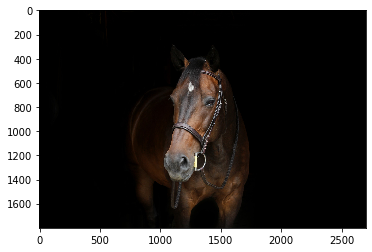

In [12]:
plt.imshow(show_horse)

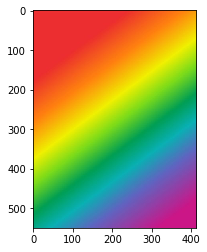

In [13]:
plt.imshow(show_rainbow)

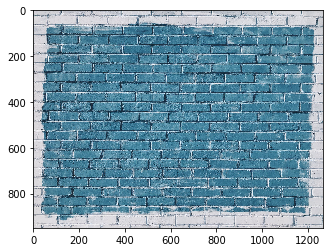

In [14]:
plt.imshow(show_bricks)

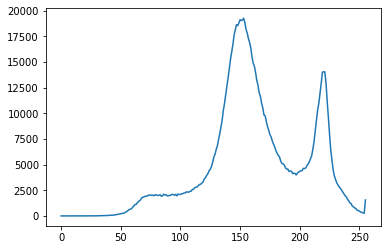

In [19]:
# Calculate histogram values.
hist_values = cv2.calcHist(images=[blue_bricks],
                           channels=[0], # Blue channel hence BGR image.
                           mask=None,
                           histSize=[256],
                           ranges=[0, 256])
plt.plot(hist_values)

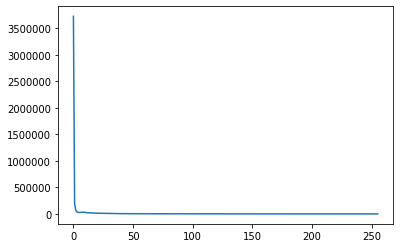

In [29]:
hist_values = cv2.calcHist(images=[dark_horse],
                           channels=[0],
                           mask=None,
                           histSize=[256],
                           ranges=[0, 256])
plt.plot(hist_values)

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE BRICKS')

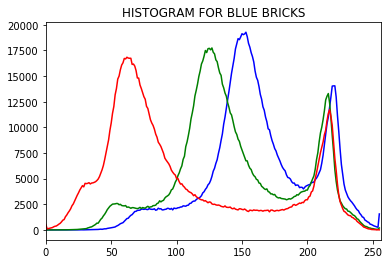

In [33]:
img = blue_bricks

color = ['b', 'g', 'r']
for i, col in enumerate(color):
    hist_values = cv2.calcHist(images=[img],
                               channels=[i],
                               mask=None,
                               histSize=[256],
                               ranges=[0, 256])
    plt.plot(hist_values, color=col)
    plt.xlim(0, 256)

plt.title('HISTOGRAM FOR BLUE BRICKS')

Text(0.5, 1.0, 'HISTOGRAM FOR DARK HORSE')

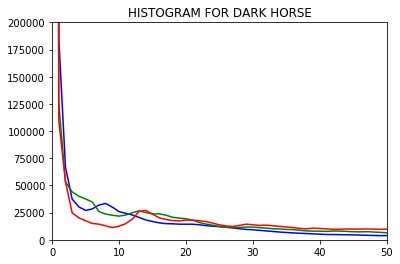

In [41]:
img = dark_horse

color = ['b', 'g', 'r']
for i, col in enumerate(color):
    hist_values = cv2.calcHist(images=[img],
                               channels=[i],
                               mask=None,
                               histSize=[256],
                               ranges=[0, 256])
    plt.plot(hist_values, color=col)
    plt.xlim(0, 50)
    plt.ylim(0, 200_000)

plt.title("HISTOGRAM FOR DARK HORSE")

In [68]:
print('''
# #################################################################################################
#  Histogram - Part Two(2) - Masking
# #################################################################################################
''')


# #################################################################################################
#  Histogram - Part Two(2) - Masking
# #################################################################################################



In [43]:
img = rainbow
img.shape

(550, 413, 3)

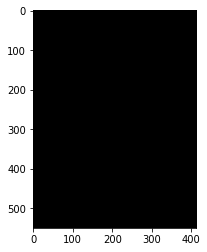

In [46]:
mask = np.zeros(img.shape[:2], dtype=np.uint8)
plt.imshow(mask, cmap='gray')

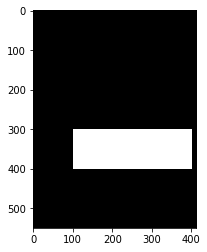

In [48]:
mask[300:400, 100:400] = 255
plt.imshow(mask, cmap='gray')

In [56]:
masked_image = cv2.bitwise_and(img, img, mask=mask)
show_masked_rainbow = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)

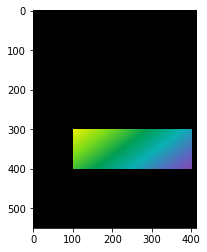

In [58]:
plt.imshow(show_masked_rainbow)

In [64]:
hist_masked_values_red = cv2.calcHist(images=[rainbow],
                                     channels=[2],
                                     mask=mask,
                                     histSize=[256],
                                     ranges=[0, 256])

hist_values_red = cv2.calcHist(images=[rainbow],
                               channels=[2],
                               mask=None,
                               histSize=[256],
                               ranges=[0, 256])

Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW')

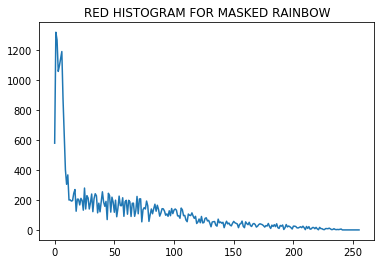

In [65]:
plt.plot(hist_masked_values_red)
plt.title('RED HISTOGRAM FOR MASKED RAINBOW')

Text(0.5, 1.0, 'RED HISTOGRAM FOR NORMAL RAINBOW')

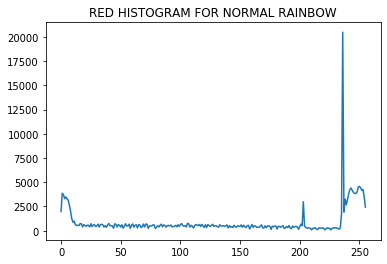

In [66]:
plt.plot(hist_values_red)
plt.title('RED HISTOGRAM FOR NORMAL RAINBOW')

In [70]:
print('''
# #################################################################################################
#  Histogram - Part Three(3) - Equalization
# #################################################################################################
''')


# #################################################################################################
#  Histogram - Part Three(3) - Equalization
# #################################################################################################



In [76]:
gorilla = cv2.imread('../../notebooks/DATA/gorilla.jpg', flags=0)

In [8]:
def display_image(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

(1295, 1955)


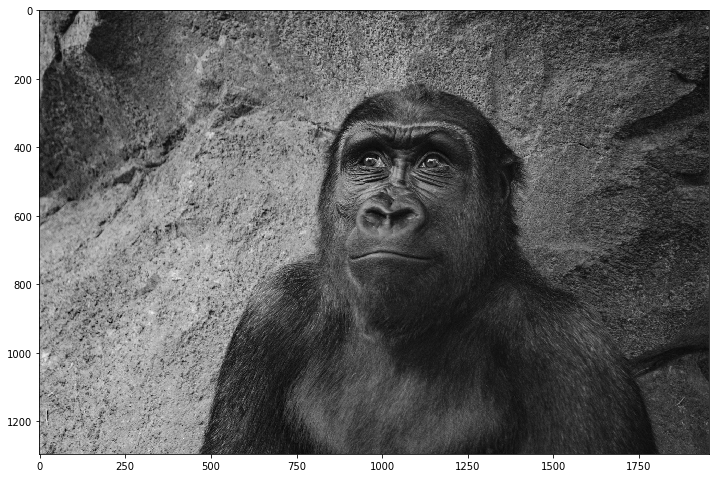

In [79]:
print(gorilla.shape)
display_image(gorilla)

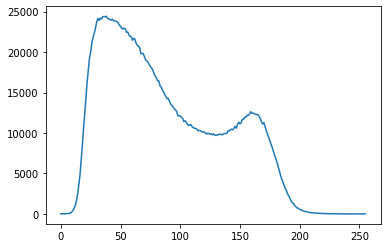

In [81]:
hist_values = cv2.calcHist(images=[gorilla],
                           channels=[0],
                           mask=None,
                           histSize=[256],
                           ranges=[0, 256])

plt.plot(hist_values)

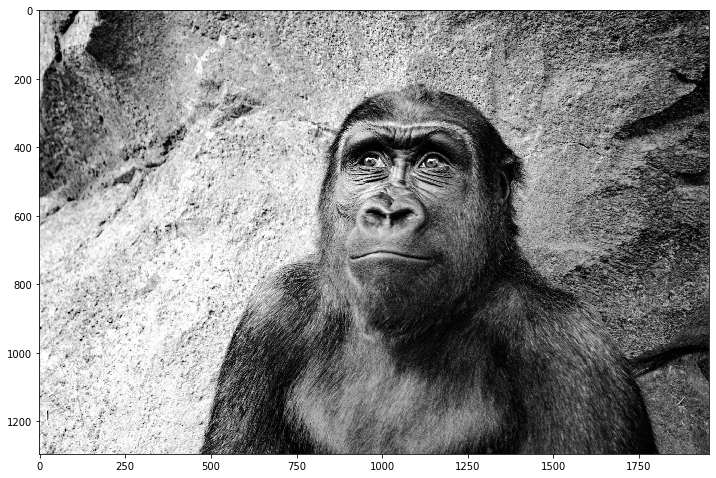

In [83]:
# Equalize the 'gorilla' images with OpenCV.
equalized_gorilla = cv2.equalizeHist(gorilla)

display_image(equalized_gorilla)

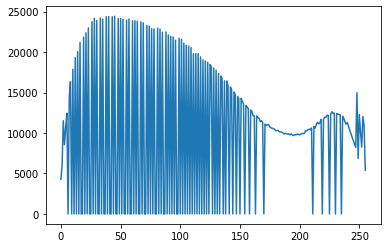

In [85]:
hist_values = cv2.calcHist(images=[equalized_gorilla],
                           channels=[0],
                           mask=None,
                           histSize=[256],
                           ranges=[0, 256])

plt.plot(hist_values)

In [5]:
# Histogram equalization with color images.
color_gorilla = cv2.imread('../../notebooks/DATA/gorilla.jpg')
color_gorilla = cv2.resize(color_gorilla, dsize=(0, 0), fx=.5, fy=.5)

show_gorilla = cv2.cvtColor(color_gorilla, code=cv2.COLOR_BGR2RGB)
hsv_gorilla = cv2.cvtColor(color_gorilla, code=cv2.COLOR_BGR2HSV)

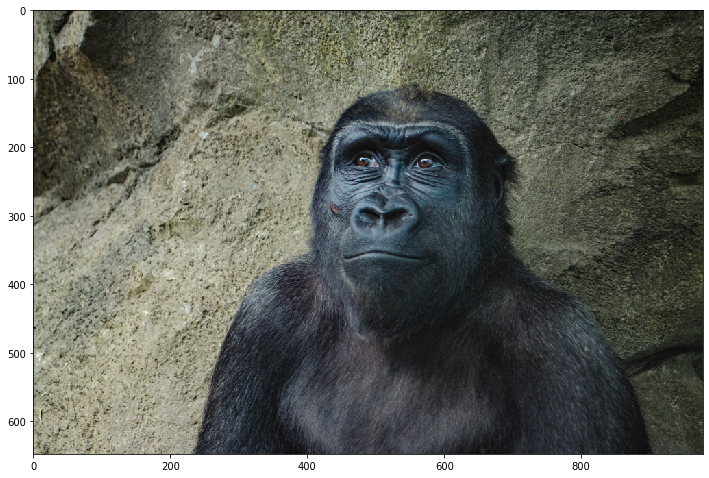

In [9]:
display_image(show_gorilla)

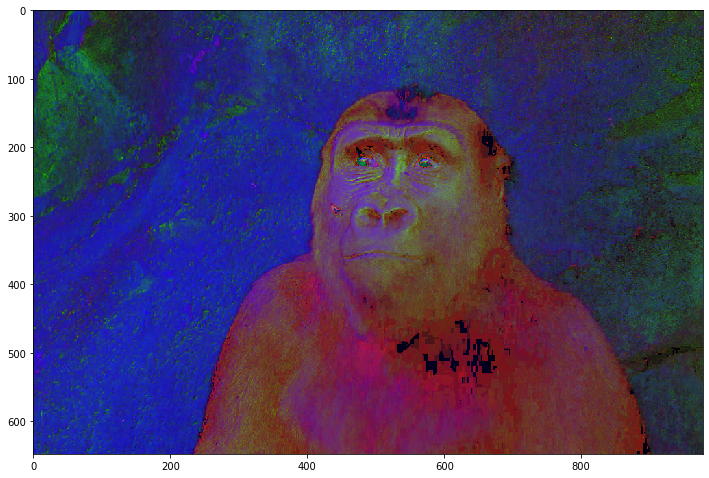

In [10]:
display_image(hsv_gorilla)

In [13]:
# Due to implementation of 'cv2.equalizeHist' function, we should work with HSV color channels.
# More importantly, the 'Value' (V) channel we going to equalize since it goes all the way from
# 0 to 255.
hsv_gorilla[:, :, 2] = cv2.equalizeHist(hsv_gorilla[:, :, 2])

In [14]:
# Convert this HSV color channels to RGB back again.
rgb_gorilla = cv2.cvtColor(hsv_gorilla, code=cv2.COLOR_HSV2RGB)

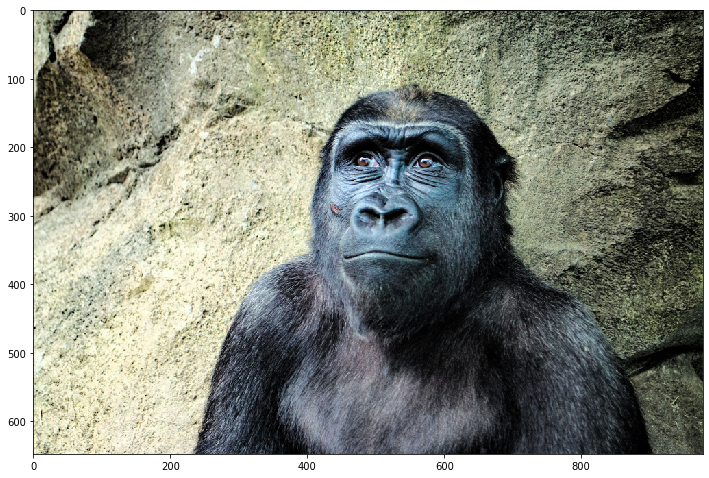

In [15]:
display_image(rgb_gorilla)